In [1]:
# Data Wrangling libraries
import pandas as pd 
import numpy as np 
from scipy import stats 

# Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.ticker as ticker

# Machine Learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [2]:
base = pd.read_csv("Movies_new.csv")

In [3]:
base["Profit"] = base["Revenue"] - base["Budget"]
base.to_csv("Movies_profit.csv", index=False)

In [4]:
base.describe()

,ID,Year,Rating,Vote Average,Vote Count,Runtime,Budget,Revenue,Profit
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.00000,2.770000e+02,2.770000e+02,2.770000e+02
mean,208317.862816,2008.137184,3.732852,3.639711,5623.187726,122.01444,5.533583e+07,2.791656e+08,2.238298e+08
std,180983.979584,14.994055,0.808091,0.320683,4561.736731,29.92018,6.705762e+07,3.811635e+08,3.263100e+08
min,24.000000,1940.000000,1.000000,2.100000,139.000000,81.00000,0.000000e+00,0.000000e+00,-1.510000e+08
25%,9426.000000,2004.000000,3.000000,3.450000,2014.000000,105.00000,9.000000e+06,2.700707e+07,9.584500e+06
50%,263115.000000,2015.000000,4.000000,3.650000,4099.000000,118.00000,2.500000e+07,1.123999e+08,9.121694e+07
75%,346685.000000,2017.000000,4.000000,3.850000,8443.000000,133.00000,8.200000e+07,3.635333e+08,2.915159e+08
max,619264.000000,2020.000000,5.000000,4.350000,23392.000000,467.00000,3.560000e+08,2.797801e+09,2.441801e+09


Describe function show that the Budget and Revenue columns has 0 as a min values, however, the info() function showed that there isnt any NaN value

In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            277 non-null    int64  
 1   Movie         277 non-null    object 
 2   Year          277 non-null    int64  
 3   Rating        277 non-null    int64  
 4   Watched       277 non-null    object 
 5   Cinema        277 non-null    bool   
 6   Vote Average  277 non-null    float64
 7   Vote Count    277 non-null    int64  
 8   Runtime       277 non-null    int64  
 9   Genres        277 non-null    object 
 10  Budget        277 non-null    int64  
 11  Revenue       277 non-null    int64  
 12  Overview      277 non-null    object 
 13  Profit        277 non-null    int64  
dtypes: bool(1), float64(1), int64(8), object(4)
memory usage: 28.5+ KB


In [10]:
base.count()
base.isnull().sum()

ID              0
Movie           0
Year            0
Rating          0
Watched         0
Cinema          0
Vote Average    0
Vote Count      0
Runtime         0
Genres          0
Budget          0
Revenue         0
Overview        0
Profit          0
dtype: int64

This function replace all 0 value to NaN and then it is possible to fill this values with the median of the specific column

In [6]:
replace = base.replace(0, np.nan, inplace=True)
replace

In [11]:
#base.count()
base.isnull().sum()

ID               0
Movie            0
Year             0
Rating           0
Watched          0
Cinema           0
Vote Average     0
Vote Count       0
Runtime          0
Genres           0
Budget          20
Revenue         23
Overview         0
Profit          11
dtype: int64

In [8]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            277 non-null    int64  
 1   Movie         277 non-null    object 
 2   Year          277 non-null    int64  
 3   Rating        277 non-null    int64  
 4   Watched       277 non-null    object 
 5   Cinema        277 non-null    bool   
 6   Vote Average  277 non-null    float64
 7   Vote Count    277 non-null    int64  
 8   Runtime       277 non-null    int64  
 9   Genres        277 non-null    object 
 10  Budget        257 non-null    float64
 11  Revenue       254 non-null    float64
 12  Overview      277 non-null    object 
 13  Profit        266 non-null    float64
dtypes: bool(1), float64(4), int64(5), object(4)
memory usage: 28.5+ KB


In [13]:
budget_median = base.Budget.median()
revenue_median = base.Revenue.median()
profit_median = base.Profit.median()

In [14]:
base["Budget"].fillna(budget_median, inplace = True)
base["Revenue"].fillna(revenue_median, inplace = True)
base["Profit"].fillna(profit_median, inplace = True)

In [16]:
base.describe()

,ID,Year,Rating,Vote Average,Vote Count,Runtime,Budget,Revenue,Profit
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.00000,2.770000e+02,2.770000e+02,2.770000e+02
mean,208317.862816,2008.137184,3.732852,3.639711,5623.187726,122.01444,5.750189e+07,2.917754e+08,2.276384e+08
std,180983.979584,14.994055,0.808091,0.320683,4561.736731,29.92018,6.570116e+07,3.741417e+08,3.242207e+08
min,24.000000,1940.000000,1.000000,2.100000,139.000000,81.00000,3.250000e+05,5.638500e+04,-1.510000e+08
25%,9426.000000,2004.000000,3.000000,3.450000,2014.000000,105.00000,1.300000e+07,4.666586e+07,1.772164e+07
50%,263115.000000,2015.000000,4.000000,3.650000,4099.000000,118.00000,3.000000e+07,1.518660e+08,9.590902e+07
75%,346685.000000,2017.000000,4.000000,3.850000,8443.000000,133.00000,8.200000e+07,3.635333e+08,2.915159e+08
max,619264.000000,2020.000000,5.000000,4.350000,23392.000000,467.00000,3.560000e+08,2.797801e+09,2.441801e+09


# Outliers

In [ ]:
min_budget_thresold, max_budget_thresold = base.Budget.quantile([0.005, 0.995]) 
min_profit_thresold, max_profit_thresold = base.Budget.quantile([0.005, 0.995]) 

In [ ]:
min_profit_thresold, max_profit_thresold = base.Budget.quantile([0.005, 0.995]) 
min_profit_thresold, max_profit_thresold

In [ ]:
base[base["Budget"]< min_budget_thresold]
base[base["Budget"]> max_budget_thresold]

In [ ]:
base[base["Profit"]< min_profit_thresold]
base[base["Profit"]> max_profit_thresold]

In [ ]:
base_outliers = base[(base.Budget < max_budget_thresold) & (base.Budget > min_budget_thresold) & (base.Profit < max_profit_thresold) &  (base.Profit > min_profit_thresold) ]

In [ ]:
base_outliers

# Graph Analysis

# Boxplot comparing user rating and movies database average ratings

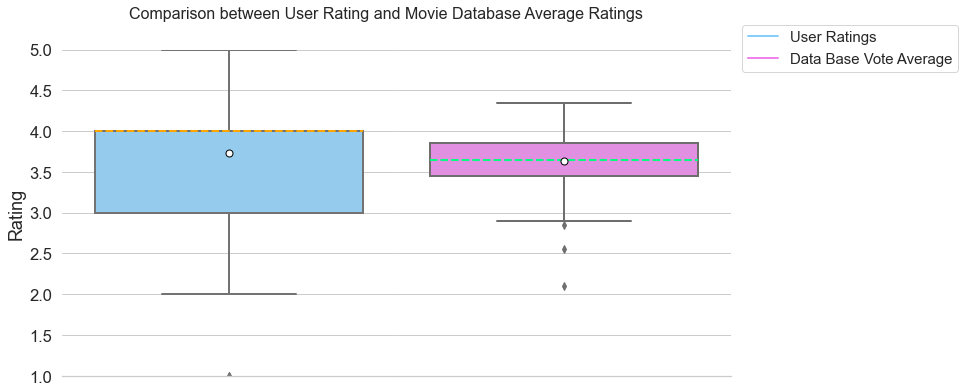

In [46]:
fig, axs = plt.subplots(ncols=2, figsize = (12,6), sharey=True)
fig.suptitle("Comparison between User Rating and Movie Database Average Ratings", fontsize=16)
plt.subplots_adjust(wspace=0, hspace=0)
plt.ylim(1,5)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
sns.despine(left= True)
sns.set_style("whitegrid")



user_boxplot = sns.boxplot(y = base["Rating"], 
                            color="lightskyblue", 
                            showmeans=True, 
                            meanprops= {"marker":"o",
                                        "markerfacecolor":"white", 
                                        "markeredgecolor":"black", 
                                        "markersize":"7"},
                            medianprops = {"color":"orange", 
                                           "linestyle":"--"}, 
                            ax=axs[0])


database_boxplot = sns.boxplot(y = base["Vote Average"], 
                           color="violet", 
                           showmeans=True,
                           meanprops= {"marker":"o",
                                       "markerfacecolor":"white", 
                                       "markeredgecolor":"black", 
                                       "markersize":"7"},
                           medianprops = {"color":"springgreen", 
                                          "linestyle":"--"},
  
                           ax=axs[1]).set(ylabel=None)

legend = plt.legend(loc='upper right', labels=['User Ratings', 'Data Base Vote Average'], bbox_to_anchor=(1.7, 1.1), fontsize = "small")
legend.legendHandles[0].set_color('lightskyblue')
legend.legendHandles[1].set_color('violet')


plt.savefig("Graphs/Boxplot_Ratings")

# Transform the genres in a Series of genres and  Genres x Rating x Vote Average

In [ ]:
df_genres_id= pd.Series(base["Genres"].values, index = base["ID"], name = "Genres")
split_genres = df_genres_id.str.split("|", expand = False)
genres_explode = split_genres.explode()

genres_explode

In [ ]:
df_genres = genres_explode.to_frame()
df_genres.reset_index(level=0, inplace=True)
genres_count = genres_explode.value_counts()

genres_unique = df_genres["Genres"].unique()


In [ ]:
merge_data = df_genres.merge(base[['ID','Rating', 'Vote Average']], 
           on = "ID",
           how='left')   
by_genres = merge_data.groupby("Genres")   

In [ ]:
merge_data
merge_data.to_csv("Merge Data.csv", index=False)

In [ ]:
sns.set(style='white')
sns.despine(right=True, left=True)


bins = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5]

g = sns.FacetGrid(merge_data, col = "Genres", col_wrap= 6, sharex= False, sharey= False)
g = g.map(plt.hist, "Rating", color = "violet", bins = bins, alpha = 0.5)
g = g.map(plt.hist, "Vote Average", color = "lightskyblue", bins = bins, alpha = 0.5)

g.set(xlim=(0, 6))
g.set_titles("{col_name}")
g.set_axis_labels("Votes", "Occorences")


plt.legend(loc='upper center', labels=['User Rating', 'Data Base Rating'], bbox_to_anchor=(1.5, 3.2), fontsize = "large")

In [ ]:
merge_data.Genres.value_counts()

In [ ]:
genres_unique

# Year x Rating

* Deixar esse gráfico legal - decidir se vou realmente usar
* Arrumar o hue
* Tentar colocar uma colorbar somente nos valores de vote average relacionando com vote count

In [ ]:
sns.set(rc={"figure.figsize": (12,10)},font_scale=1.5)
sns.set_style("white")


user_ratings= sns.scatterplot(x = base["Rating"], 
                y = base["Year"],
                s = 200,
                color = "green"
                )

database_rating = sns.scatterplot(x = base["Vote Average"], 
                y = base["Year"],
                s = 200,
                hue = base["Vote Average"]
                )

#cbar = plt.colorbar(database_rating) 

user_ratings.set(xlabel='Rating', ylabel='Year')

plt.savefig("Graphs/Year_Rating")

# WordCloud dos generos

In [ ]:
all_genres = " ".join(s for s in genres_explode).strip()

all_genres

In [ ]:
all_genres = " ".join(s for s in genres_explode)


wordcloud = WordCloud(background_color="black",
                      font_path='Andale Mono',
                      width=1600, height=800,
                      collocations=False,
                      colormap = "viridis").generate(all_genres)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")

plt.savefig("Graphs/WordCloud")

In [ ]:
wordcloud.words_

Provavelmente não vou usar esse gráfico

In [ ]:
palette = sns.color_palette("PiYG_r", 18)
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2})
sns.set(rc={'figure.figsize':(10,6)})


barplot = sns.barplot(genres_count.index,
                      genres_count.values,
                      palette = palette
                      )

plt.xticks(rotation=45, fontsize=12, ha = "right")
plt.yticks(fontsize=12)

# Top 10 voted movies

In [ ]:
vote_count = base.sort_values("Vote Count", ascending= False)
top_voted = vote_count.head(n =10)

top_voted

In [ ]:
palette = sns.color_palette("Purples_r", 10)
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2})
sns.set(rc={'figure.figsize':(10,6)})


barplot = sns.barplot(x= top_voted["Vote Count"],
                      y = top_voted["Movie"], 
                      palette = palette,
                      orient = "h").set(ylabel = None)

plt.xticks(rotation=45, fontsize=12, ha = "center")
plt.yticks(fontsize=12)

plt.savefig(plt.savefig("Graphs/Top Voted Movies"), bbox_inches='tight')

# Top 10 rated movies

In [ ]:
vote = base.sort_values("Vote Average", ascending= False)
top_rated = vote.head(n =10)

top_rated

# Linear regression between Budget and Profit

* Trying to discover if it is possible to predict the Profit by the Revenue - any relationship

In [ ]:
base.corr()

In [ ]:
max_thresold = base["Budget"].quantile(0.95)
min_thresold = base["Budget"].quantile(0.05)

In [ ]:
max_thresold


In [ ]:
base.sort_values("Profit", ascending= False).head(10)

In [ ]:
base.describe()

In [ ]:
base.sort_values("Budget",ascending = False).head(10)
base.sort_values("Revenue",ascending = False).head(10)

* Ver se esse gráfico abaixo vai ser interessante e se sim, inverter a ordem dos filmes

In [ ]:
plt.xscale('log')
plt.xlim(10000,10000000000)
plt.xticks([1e5,1e6, 1e7, 1e8, 1e9, 1e10])
sns.set_style("white")

budget = base.sort_values("Budget", ascending = False).iloc[0:20]


lollipop = plt.hlines(budget["Movie"], 
          xmin=base["Budget"], 
          xmax=base['Revenue'],
          color = "navy",
          )

In [ ]:
base.sort_values("Budget", ascending= False).head(20)

# Relation between Year and Revenue

* Melhorar o hue (eixo)

In [ ]:
plt.yscale("log")
sns.set_context("notebook", font_scale=1.2)
sns.set(rc = {"figure.figsize":(12,8)})


# sns.scatterplot(data = base, 
#                 x = "Year", 
#                 y = "Budget",
#                 alpha=.6,
#                 color = "darkviolet",
#                 s = 150,
#                 marker = "X")

sns.scatterplot(data = base, 
                x = "Year", 
                y = "Revenue",
                alpha=1,
                color = "navy",
                s = 150,
                hue = "Rating"
                )


plt.ylim(100000,10000000000)
plt.yticks([1e6, 1e7, 1e8, 1e9, 1e10])
plt.xlim(1940,2020, 10)


In [ ]:
#mask = np.triu(base.corr())
values = base[["Year", "Rating","Runtime", "Vote Average", "Vote Count", "Budget", "Revenue", "Profit"]]
sns.set(rc={'figure.figsize':(10,6)})

#creating the colormap
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)


sns.heatmap(values.corr(), 
            annot = True, 
            vmin=-1, vmax=1, center= 0, 
            cmap= cmap,
            cbar_kws = {"ticks":[-1, -.5,0,.5,1]}
            )
            
plt.xticks(rotation = 45, ha = "center")


plt.savefig("Graphs/Correlation Heatmap")